<a href="https://colab.research.google.com/github/lukmanaj/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/week3/week_3_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 1.0

### WEEK 3 Exercises

####Name : Lukman Aliyu Jibril
####email: lukman.j.aliyu@gmail.com

### Exercises:
Please, see week 3 exercises from [**Learn PyTorch for Deep Learning**: 02. Pytorch Workflows](https://www.learnpytorch.io/02_pytorch_classification/#exercises)

In [1]:
# Importing PyTorch and its neural network module.
# PyTorch is an open-source machine learning library used for applications such as computer vision and natural language processing.
import torch
import torch.nn as nn

#importing numpy to allow for working with arrays
import numpy as np
# Importing pyplot from matplotlib for plotting graphs and visualizing data.
# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
from matplotlib import pyplot as plt

# Installing torchmetrics using pip. The '-q' flag is used for quiet installation, minimizing the output to the console.
# Torchmetrics is a collection of machine learning metrics for distributed, scalable PyTorch models.
!pip install -q torchmetrics

# Importing Accuracy from torchmetrics, which is a metric for evaluating accuracy of model predictions.
from torchmetrics import Accuracy

# Importing necessary libraries from scikit-learn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Importing tqdm for providing progress bars to loops.
# Tqdm is a fast, extensible progress bar for Python and CLI that adds a minimal overhead.
from tqdm import tqdm

# Displaying the version of PyTorch being used.
torch.__version__


'2.1.0+cu121'

In [2]:
# Setup for device-agnostic code in PyTorch.

# torch.cuda.is_available() checks if CUDA (NVIDIA GPU support) is available.
# If CUDA is available, it sets 'device' to 'cuda' to use the GPU for computations.
# Otherwise, it sets 'device' to 'cpu' to use the central processing unit.
# This approach ensures that the code runs on a GPU if available, and falls back to CPU otherwise.
device = "cuda" if torch.cuda.is_available() else "cpu"

# Printing the device being used. This is helpful for confirmation and debugging purposes.
# It prints 'Using device: cuda' if a GPU is available, and 'Using device: cpu' otherwise.
print(f"Using device: {device}")


Using device: cpu


1. Make a binary classification dataset with Scikit-Learn's make_moons() function.

* For consistency, the dataset should have 1000 samples and a random_state=42.
Turn the data into PyTorch tensors.
* Split the data into training and test sets using train_test_split with 80% training and 20% testing.


In [3]:

# Generating a binary classification dataset with 1000 samples using the make_moons function.
# The noise parameter adds some randomness to the data, and random_state=42 ensures reproducibility.
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Splitting the data into training and testing sets.
# 80% of the data is used for training and 20% for testing.
# random_state=42 ensures that the split is reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting numpy arrays to PyTorch tensors and transferring them to the appropriate device (GPU or CPU).
# The .float() method is used to ensure the data is in float32 format, which is generally the default for PyTorch models.
X_train = torch.from_numpy(X_train).float().to(device)
X_test = torch.from_numpy(X_test).float().to(device)
y_train = torch.from_numpy(y_train).float().to(device)
y_test = torch.from_numpy(y_test).float().to(device)

# Printing the shapes of the training and testing datasets.
# This is helpful for verifying the sizes of each dataset.
for _ in (X_train, X_test, y_train, y_test):
    print(_.shape)


torch.Size([800, 2])
torch.Size([200, 2])
torch.Size([800])
torch.Size([200])


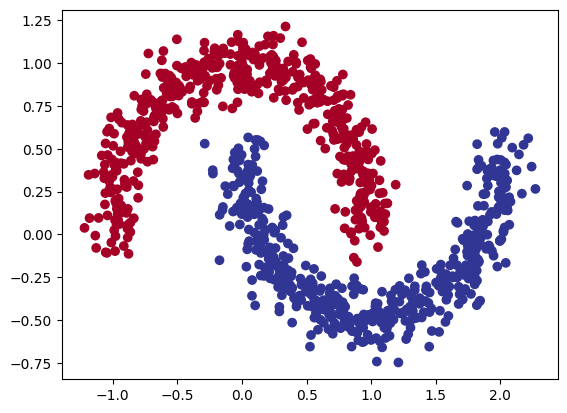

In [4]:
# Creating a scatter plot of the dataset.
# X[:, 0] and X[:, 1] are used to get the first and second features (dimensions) of the data points respectively.
# The parameter 'c=y' colors the data points based on their class labels, which helps in visualizing the class distribution.
# 'cmap=plt.cm.RdYlBu' specifies the color map to use. RdYlBu stands for Red-Yellow-Blue, providing good contrast for binary classes.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# Displaying the plot.
# This line is necessary to show the plot when not using interactive environments like Jupyter notebooks.
plt.show()


2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

* Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [5]:
# Subclassing nn.Module to create a custom model.
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the first fully connected (linear) layer with 2 input features and 16 output features.
        self.fc1 = nn.Linear(2, 16)

        # Initializing a ReLU activation function to introduce non-linearity.
        self.relu = nn.ReLU()

        # Defining the second fully connected layer with 16 input features (from fc1) and 32 output features.
        self.fc2 = nn.Linear(16, 32)

        # Defining the third fully connected layer with 32 input features and 1 output feature.
        # This output is suitable for binary classification.
        self.fc3 = nn.Linear(32, 1)

        # Initializing a Sigmoid activation function to output a value between 0 and 1, representing the probability for binary classification.
        self.sigmoid = nn.Sigmoid()

    # Defining the forward pass of the model.
    def forward(self, x):
        # Passing the input through the first layer and then applying ReLU activation.
        x = self.relu(self.fc1(x))

        # Passing the result through the second layer and applying ReLU activation again.
        x = self.relu(self.fc2(x))

        # Passing the result through the third layer.
        x = self.fc3(x)

        return x

# Creating an instance of the MyModel class.
model = MyModel()

# Printing the state dictionary of the model which contains all the weights and biases of the network.
# This can be useful for understanding the model's parameters and for debugging.
model.state_dict()


OrderedDict([('fc1.weight',
              tensor([[ 0.5711, -0.4336],
                      [-0.6353,  0.3508],
                      [ 0.4384,  0.6928],
                      [-0.6653,  0.0238],
                      [ 0.0779,  0.3843],
                      [-0.4330, -0.1155],
                      [-0.6680,  0.3235],
                      [ 0.4390, -0.7002],
                      [-0.1630, -0.1955],
                      [ 0.1369,  0.5909],
                      [ 0.2077,  0.3648],
                      [-0.2133,  0.2419],
                      [-0.6048,  0.0501],
                      [-0.4462, -0.1024],
                      [-0.1014,  0.3880],
                      [ 0.1458, -0.1801]])),
             ('fc1.bias',
              tensor([-0.5639,  0.5124, -0.0768, -0.1301,  0.2934, -0.3223, -0.0316,  0.2682,
                       0.2916, -0.6179, -0.5168, -0.5347, -0.6248, -0.0264, -0.3448, -0.3480])),
             ('fc2.weight',
              tensor([[-0.2442, -0.1256, -0.1614, -0

3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [6]:
# Setting up the loss function for binary classification.
# BCEWithLogitsLoss combines a Sigmoid layer and the BCELoss (Binary Cross Entropy Loss) in one single class,
# which is more numerically stable than using a plain Sigmoid followed by a BCELoss.
loss_fn = nn.BCEWithLogitsLoss()

# Setting up the optimizer.
# Adam optimizer is used here, which is an extension to stochastic gradient descent that has been empirically shown to
# work well in practice and requires little hyperparameter tuning.
# 'model.parameters()' passes all the trainable parameters of the model to the optimizer.
# 'lr=0.001' sets the learning rate to 0.001, which determines the step size at each iteration while moving toward a minimum of the loss function.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
* To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [7]:
# Setting up the accuracy metric for binary classification and moving it to the appropriate device.
# Here, 'task="multiclass"' and 'num_classes=2' are specified because we're dealing with a binary classification problem.
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device)

# Setting the random seed for reproducibility of results.
torch.manual_seed(42)

# Defining the number of epochs for training.
epochs = 1000

# Moving the training and testing data to the device (GPU or CPU).
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Starting the training loop.
for epoch in range(epochs):
    ### Training phase
    model.train()

    # Forward pass: compute the model's prediction for the training data.
    y_logits = model(X_train).squeeze()
    y_pred_probs = torch.sigmoid(y_logits)
    y_pred = torch.round(y_pred_probs)

    # Calculate the loss between the model's predictions and the true labels.
    loss = loss_fn(y_logits, y_train)
    # Calculate accuracy by comparing the predicted labels with the true labels.
    acc = acc_fn(y_pred, y_train.long())

    # Zero the gradients before the backward pass.
    optimizer.zero_grad()

    # Backward pass: compute the gradient of the loss with respect to model parameters.
    loss.backward()

    # Perform a single optimization step (parameter update).
    optimizer.step()

    ### Testing phase
    model.eval()
    with torch.inference_mode():
        # Forward pass: compute the model's prediction for the testing data.
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate the loss and accuracy for the testing data.
        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_pred, y_test.int())

    # Print training and testing results every 100 epochs.
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.70 Acc: 0.50 | Test loss: 0.70 Test acc: 0.50
Epoch: 100 | Loss: 0.43 Acc: 0.85 | Test loss: 0.45 Test acc: 0.83
Epoch: 200 | Loss: 0.25 Acc: 0.89 | Test loss: 0.26 Test acc: 0.90
Epoch: 300 | Loss: 0.16 Acc: 0.93 | Test loss: 0.17 Test acc: 0.93
Epoch: 400 | Loss: 0.11 Acc: 0.96 | Test loss: 0.11 Test acc: 0.97
Epoch: 500 | Loss: 0.06 Acc: 0.99 | Test loss: 0.06 Test acc: 1.00
Epoch: 600 | Loss: 0.03 Acc: 1.00 | Test loss: 0.03 Test acc: 1.00
Epoch: 700 | Loss: 0.02 Acc: 1.00 | Test loss: 0.02 Test acc: 1.00
Epoch: 800 | Loss: 0.01 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 900 | Loss: 0.01 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00


5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [8]:
# Function to plot the decision boundary of the model.
def plot_decision_boundary(model, X, y):
    # Determining the minimum and maximum values of X and expanding the range slightly.
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Creating a meshgrid for plotting.
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Stacking xx and yy into a matrix of coordinates.
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Making predictions using the model.
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Adjusting the output based on whether it's binary or multi-class classification.
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # Multi-class classification.
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # Binary classification.

    # Reshaping the predictions to match the shape of xx, yy for plotting.
    y_pred = y_pred.reshape(xx.shape).detach().numpy()

    # Plotting the decision boundary.
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    # Overlaying the scatter plot of the actual data points.
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    # Setting the limits of the plot to the min and max of the grid.
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



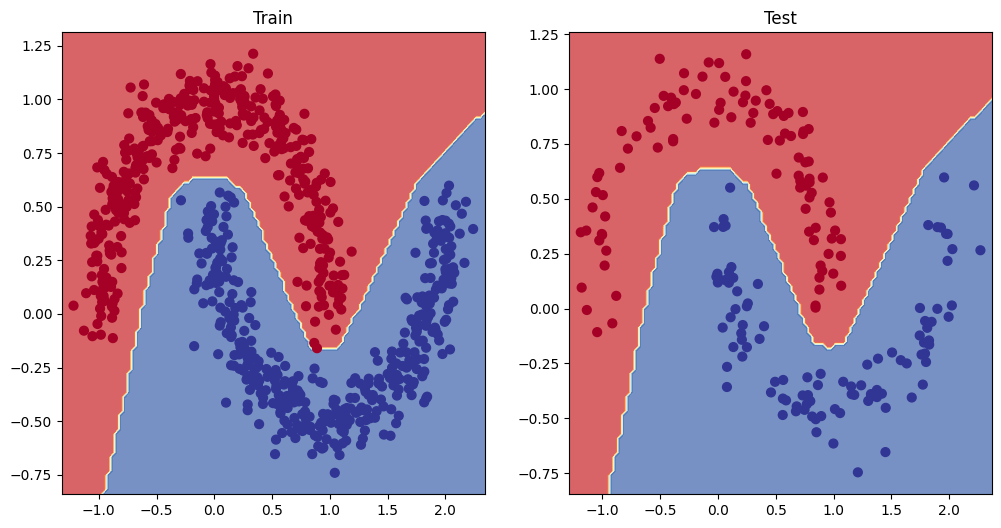

In [9]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

7. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
* Feel free to reference the ML cheatsheet website for the formula.

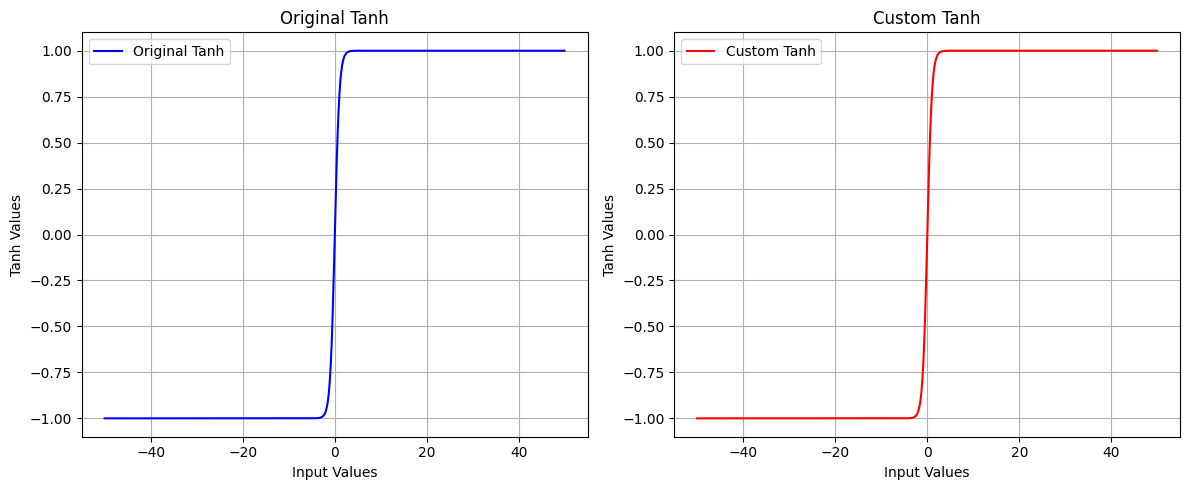

In [10]:
# Generating a range of values from -50 to 50
tensor = torch.arange(-50, 50, 0.1)

# Original Tanh function from PyTorch
tanh_original = torch.tanh(tensor)

# Custom Tanh function
def custom_tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

# Calculating Tanh using the custom function
tanh_custom = custom_tanh(tensor)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the original Tanh
axs[0].plot(tensor.numpy(), tanh_original.numpy(), label='Original Tanh', color='blue')
axs[0].set_xlabel('Input Values')
axs[0].set_ylabel('Tanh Values')
axs[0].legend()
axs[0].set_title('Original Tanh')
axs[0].grid(True)

# Plotting the custom Tanh
axs[1].plot(tensor.numpy(), tanh_custom.numpy(), label='Custom Tanh', color='red')
axs[1].set_xlabel('Input Values')
axs[1].set_ylabel('Tanh Values')
axs[1].legend()
axs[1].set_title('Custom Tanh')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

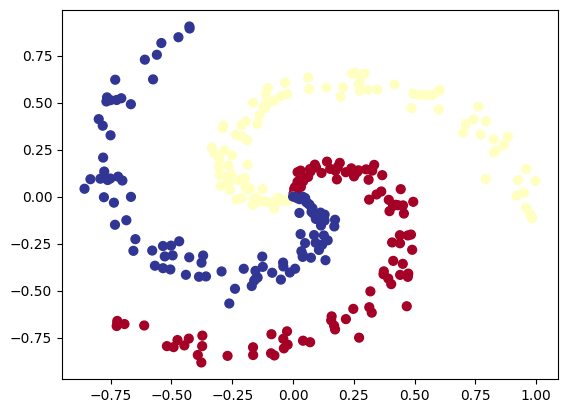

In [11]:
# Set a random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Define dataset parameters
N = 100     # Number of points per class
D = 2       # Dimensionality
K = 3       # Number of classes

# Create empty arrays to store data and labels
X = np.zeros((N * K, D))          # Data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8') # Class labels

# Generate data points for each class in a spiral pattern
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)                         # Radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # Theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]        # Store data points
    y[ix] = j                                           # Assign class labels

# Visualize the generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()


In [12]:
# Convert NumPy arrays to PyTorch tensors
X = torch.from_numpy(X).type(torch.float)           # Features as float32
y = torch.from_numpy(y).type(torch.LongTensor)      # Labels need to be of type long

# Create train and test splits using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Check the lengths of train and test sets
len(X_train), len(X_test), len(y_train), len(y_test)


(240, 60, 240, 60)

In [13]:
# Define the number of classes for the multiclass task
num_classes = 3

# Create the accuracy function and send it to the device
acc_fn = Accuracy(task="multiclass", num_classes=num_classes).to(device)

# Display the accuracy function
acc_fn


MulticlassAccuracy()

In [14]:
# Prepare device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SpiralClassificationModel(nn.Module):
    def __init__(self):
        super(SpiralClassificationModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# Create the model and move it to the specified device
model_1 = SpiralClassificationModel().to(device)

# Display the model
model_1


SpiralClassificationModel(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [15]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
data_types = (X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

# Print data types
print("Data Types (Train/Test):", data_types)

# Print out untrained model outputs
with torch.no_grad():
    logits = model_1(X_train)[:10]
    pred_probs = torch.softmax(logits, dim=1)
    pred_labels = pred_probs.argmax(dim=1)

# Print logits, predicted probabilities, and predicted labels
print("Logits:\n", logits)
print("Pred probabilities:\n", pred_probs)
print("Pred labels:\n", pred_labels)


Data Types (Train/Test): (torch.float32, torch.float32, torch.int64, torch.int64)
Logits:
 tensor([[-0.2160, -0.0600,  0.2256],
        [-0.2020, -0.0530,  0.2257],
        [-0.2223, -0.0604,  0.2384],
        [-0.2174, -0.0555,  0.2826],
        [-0.2201, -0.0502,  0.2792],
        [-0.2195, -0.0565,  0.2457],
        [-0.2212, -0.0581,  0.2440],
        [-0.2251, -0.0631,  0.2354],
        [-0.2116, -0.0548,  0.2336],
        [-0.2170, -0.0552,  0.2842]])
Pred probabilities:
 tensor([[0.2685, 0.3139, 0.4176],
        [0.2707, 0.3142, 0.4151],
        [0.2659, 0.3126, 0.4215],
        [0.2615, 0.3074, 0.4311],
        [0.2609, 0.3092, 0.4299],
        [0.2653, 0.3123, 0.4224],
        [0.2653, 0.3123, 0.4224],
        [0.2659, 0.3127, 0.4214],
        [0.2681, 0.3136, 0.4184],
        [0.2614, 0.3072, 0.4314]])
Pred labels:
 tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [16]:
# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer with a learning rate of 0.02
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.02)


In [17]:
# Build a training loop for the model
epochs = 1000

# Create a progress bar using tqdm
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    ## Training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = acc_fn(y_pred, y_train)

    # 3. Zero the optimizer gradients
    optimizer.zero_grad()

    # 4. Backward pass and update weights
    loss.backward()
    optimizer.step()

    ## Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass for testing
        test_logits = model_1(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        # 2. Calculate test loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_pred, y_test)

    # Print out progress
    if epoch % 100 == 0:
        tqdm.write(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Training:   3%|▎         | 26/1000 [00:00<00:03, 253.80epoch/s]

Epoch: 0 | Loss: 1.12 Acc: 0.32 | Test loss: 1.10 Test acc: 0.37


Training:  15%|█▌        | 153/1000 [00:00<00:02, 305.43epoch/s]

Epoch: 100 | Loss: 0.45 Acc: 0.78 | Test loss: 0.53 Test acc: 0.68


Training:  25%|██▍       | 249/1000 [00:00<00:02, 274.11epoch/s]

Epoch: 200 | Loss: 0.12 Acc: 0.96 | Test loss: 0.09 Test acc: 0.98


Training:  34%|███▍      | 340/1000 [00:01<00:02, 279.88epoch/s]

Epoch: 300 | Loss: 0.07 Acc: 0.98 | Test loss: 0.02 Test acc: 1.00


Training:  43%|████▎     | 434/1000 [00:01<00:01, 295.03epoch/s]

Epoch: 400 | Loss: 0.05 Acc: 0.98 | Test loss: 0.01 Test acc: 1.00


Training:  55%|█████▌    | 554/1000 [00:01<00:01, 282.86epoch/s]

Epoch: 500 | Loss: 0.04 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00


Training:  65%|██████▍   | 647/1000 [00:02<00:01, 300.22epoch/s]

Epoch: 600 | Loss: 0.03 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00


Training:  74%|███████▍  | 740/1000 [00:02<00:00, 291.13epoch/s]

Epoch: 700 | Loss: 0.03 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00


Training:  85%|████████▌ | 852/1000 [00:03<00:00, 237.55epoch/s]

Epoch: 800 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00


Training:  94%|█████████▍| 942/1000 [00:03<00:00, 277.11epoch/s]

Epoch: 900 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00


Training: 100%|██████████| 1000/1000 [00:03<00:00, 278.79epoch/s]


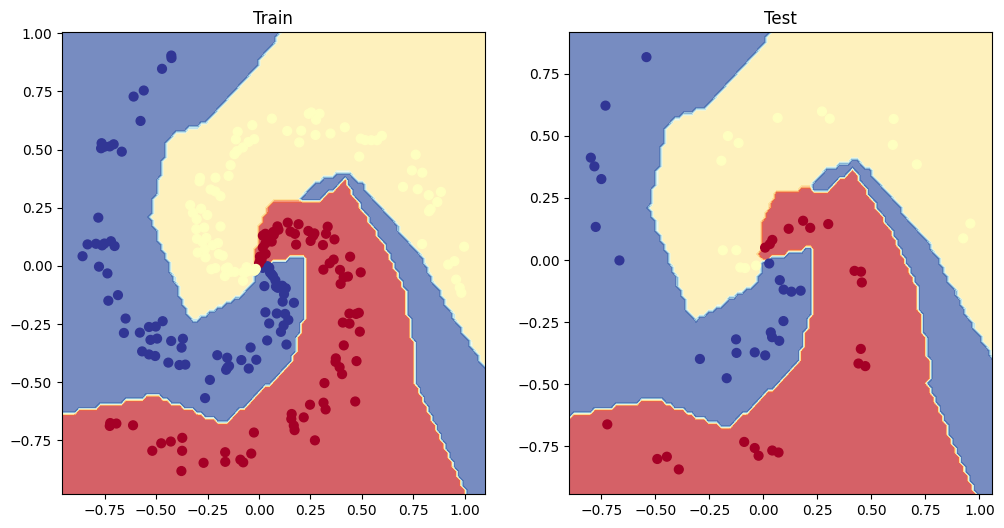

In [18]:
# Function to plot decision boundaries
def plot_decision_boundaries(model, X, y, title):
    # Set the title for the current plot
    plt.title(title)

    # Call the existing function to plot decision boundaries
    plot_decision_boundary(model, X, y)

# Create a figure with two subplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for training set
plot_decision_boundaries(model_1, X_train, y_train, "Train")

plt.subplot(1, 2, 2)  # Subplot for test set
plot_decision_boundaries(model_1, X_test, y_test, "Test")

# Display the plot
plt.show()


SUBMIT ASSIGNMENT HERE: [CLICK ME ▶️](https://forms.gle/876vi4aNoFf4A2mU7)